<a href="https://colab.research.google.com/github/CC0R0NAD0/Segmentation-using-multiple-vision-machine-paradigms/blob/main/Metodo_1_HSI_Contorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###############################################################
#                      Authors:                               #
#                  Carlos Coronado                            #
#                  Adrián Monge                               #
#                   ITCR MT 8004                              #
#   Tarea Sistemas de visión: Segmentación                    #
###############################################################


#METODO 1 PARA REALIZAR LAS SEGMENTACIONES HSV PARA COLOR Y CONTORNOS PARA FORMA


# Importante mencionar que para que este script funcione se debe correr
# en google Colab, pues se hizo uso de un parche de dicha plataforma para
# hacer correr una función de la librería cv2, que se requería.


# Inicialización del entonrno e importación de librerías


from google.colab import drive  #Librería para accesar a archivos drive
import os  #Librería manejo del sistema

# Montar el archivo del drive (con previa autorización del usuario)
drive.mount('/content/drive', force_remount=True)

# Abrir el documento con la ruta de acceso personal predeterminada.
os.chdir("/content/drive/MyDrive/Sistemas_V/T2_Segmentacion")  #Cuenta carlos

Mounted at /content/drive


(287, 780, 3)


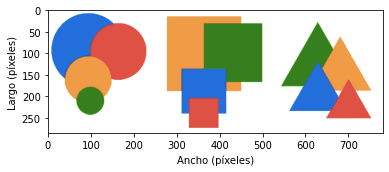

In [ ]:
import cv2  # libreria trabajo con imagenes
import matplotlib.pyplot as plt # libreria trabajo con graficos

from google.colab.patches import cv2_imshow # Se utiliza este parche para 
                                            # poder mostrar las imágenes en
                                            # pantalla



#Se carga la imagen de entrada
image = cv2.imread('imagenes/img_tarea_descargada.png')
image = cv2.imread('imagenes/cir_prim_camb4.png')

#Se imprime la forma de la imagen para conocer las dimensiones
print(image.shape)


#Se cambia espacio de color a RGB
image_plt = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#Etiquetas ejes
plt.xlabel("Ancho (píxeles)")
plt.ylabel("Largo (píxeles)")

#Se visualiza la imagen original
plt.imshow(image_plt)
plt.show()

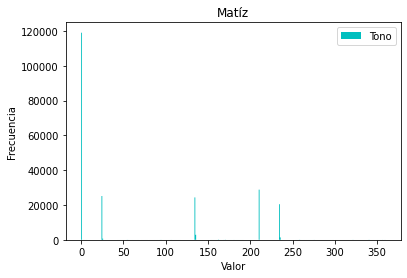

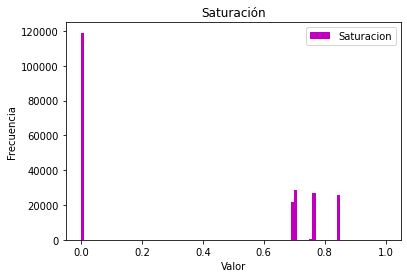

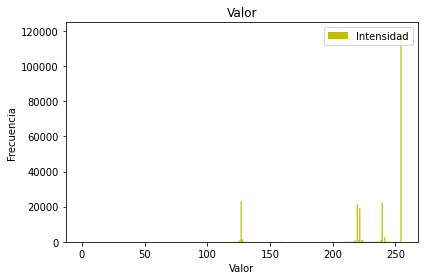

(287, 780, 3)


In [ ]:
import matplotlib.colors as colors #libreria para trabajar espacio color
import numpy as np  #libreria para manejo de arrays o arreglos


#SEGMENTACION POR COLOR, GRAFICOS HSV************************************


array=np.asarray(image)  #imagen a formato array
arr=(array.astype(float))/255.0   #se escalan los valores
img_hsv = colors.rgb_to_hsv(arr[...,:3])  # se cambia a hsv


#Imprimir graficos, se escoge tamaño
#plt.subplots(figsize=(15, 3))


lu1=img_hsv[...,0].flatten()   #Se aplana el arreglo corrspondiente al canal h
#plt.subplot(1,3,1) #ubicacion de la imagen
#se calcula histograma de h en rango de grados
plt.hist(lu1*360,bins=360,range=(0.0,360.0),histtype='stepfilled', color='c', label='Tono')
#Se imprimen las etiquetas
plt.title("Matíz")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()
plt.show() # se muestran las imagenes

lu2=img_hsv[...,1].flatten()   #Se aplana el arreglo corrspondiente al canal s
#plt.subplot(1,3,2)   #ubicacion de la imagen
#se calcula histograma de h en rango 1.0           
plt.hist(lu2,bins=100,range=(0.0,1.0),histtype='stepfilled', color='m', label='Saturacion')
#Se imprimen las etiquetas
plt.title("Saturación")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()
plt.show() # se muestran las imagenes

lu3=img_hsv[...,2].flatten()   #Se aplana el arreglo corrspondiente al canal v
#plt.subplot(1,3,3)   #ubicacion de la imagen
#se calcula histograma de h en rango de 255                
plt.hist(lu3*255,bins=256,range=(0.0,255.0),histtype='stepfilled', color='y', label='Intensidad')
#Se imprimen las etiquetas
plt.title("Valor")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

#ajuste de tamaño de imagenes
plt.tight_layout()
plt.show() # se muestran las imagenes

print(img_hsv.shape) #tamaño de arreglo con 3 canales

Ingrese:
 un 1 para detectar Rojo. 
 un 2 para detectar Amarillo. 
 un 3 para detectar Verde.
 un 4 para detectar Azul
3


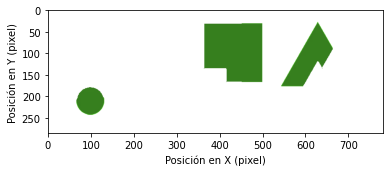

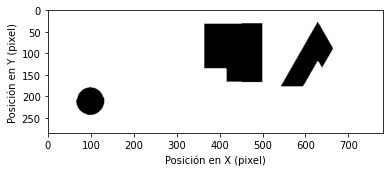

In [ ]:
# Se separa cada canal de hsv para manipularlos
h = img_hsv[...,0]
s = img_hsv[...,1]
v = img_hsv[...,2]

# Se copian los valores para recolorear
h_new = h
s_new = s
v_new = v

# Se guardan las dimensiones para hacer un ciclo y recorrer la imagen
h_img = image.shape[0]
w_img = image.shape[1]


# Se genera un array en blanco para binarizar segun cada criterio
bin_image = np.ones((h_img,w_img))


# SEGMENTACION POR COLOR*************************************************
#  Se establecen los colores correspondientes a los analizados en la imagen por
#medio del canal H, se delimita un valor de Saturacion S para quitar los
#colores menos puros y una desviacion den porcentaje para cada caso, general 5%

val_color1 =  235  #ROJO
val_sat1 = 0.5 #50%
por_desvi1 = 0.05

val_color2 =  210 #AMARILLO
val_sat2 = 0.5 #50%
por_desvi2 = 0.05

val_color3 =  135  #VERDE
val_sat3 = 0.5   #50%
por_desvi3 = 0.05

val_color4 =  25  #AZUL
val_sat4 = 0.5   #50%
por_desvi4 = 0.05

#Se hace una variable para que el usuario elija el color a detectar
color_detec= int(input("Ingrese:\n un 1 para detectar Rojo. \n un 2 para detectar Amarillo. \n un 3 para detectar Verde.\n un 4 para detectar Azul\n"))

#Se genera una variable para guardar la etiquete del color y mostrarla en el resultado
string_color = ""




#Con el for se recorre la imagen
for i in range(h_img):
    for j in range(w_img):
      #Si hay una coincidencia de H y de S
      if (int(color_detec) ==1): #Se analiza color dependiendo la entrada
        if ( ( ( val_color1 - (360*por_desvi1) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi1) ) )and  (s[i,j] > val_sat1 )):
          bin_image[i,j] = 0 # Se binariza el pixel como 0
          string_color = "Rojo" # Se define el valor de la etiqueta

      #En caso que el pixel no esté dentro del rango deseado, se cambian los valores para que sea blanco
        else:
              bin_image[i,j] = 1    #img binaria
              h_new[i,j] = 160/360
              v_new[i,j] = 1.0
              s_new[i,j] = 0.0
      
      #Re respiten el código para cada color
      elif (int(color_detec) ==2):
        if ( ( ( val_color2 - (360*por_desvi2) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi2) ) )and  (s[i,j] > val_sat2 ) ):
          bin_image[i,j] = 0
          string_color = "Amarillo"

      #En caso que el pixel no esté dentro del rango deseado, se cambian los valores para que sea blanco
        else:
              bin_image[i,j] = 1    #img binaria
              h_new[i,j] = 160/360
              v_new[i,j] = 1.0
              s_new[i,j] = 0.0

      elif (int(color_detec) ==3):
        if ( ( ( val_color3 - (360*por_desvi3) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi3) ) )and  (s[i,j] > val_sat2 ) ):
          bin_image[i,j] = 0
          string_color = "Verde"

      #En caso que el pixel no esté dentro del rango deseado, se cambian los valores para que sea blanco
        else:
              bin_image[i,j] = 1    #img binaria
              h_new[i,j] = 160/360
              v_new[i,j] = 1.0
              s_new[i,j] = 0.0

      elif (int(color_detec) ==4):
        if ( ( ( val_color4 - (360*por_desvi4) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi4) ) )and  (s[i,j] > val_sat2 ) ):
          bin_image[i,j] = 0
          string_color = "Azul"
      
      #En caso que el pixel no esté dentro del rango deseado, se cambian los valores para que sea blanco
        else:
              bin_image[i,j] = 1    #img binaria
              h_new[i,j] = 160/360
              v_new[i,j] = 1.0
              s_new[i,j] = 0.0




#Se crea la imagen para recolorear copiando el array con todos los canales
recolor = img_hsv

#Se separa cada canal y se le asignan los nuevos valores hsv
recolor[...,0] = h_new
recolor[...,1] = s_new
recolor[...,2] = v_new


new_color = colors.hsv_to_rgb(recolor[...,:3]) #se convierten de hsv a BGR

#Se convierte a RGB, pero pasando el array a un formato de imagen usado por CV2
new_color_sh = cv2.cvtColor(np.float32(new_color), cv2.COLOR_BGR2RGB)

#Se muestra la imagen y con sus etiquetas
plt.imshow(new_color_sh)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")

plt.imsave("out.png",new_color_sh)   #Se guarda la imagen en la carpeta sin frame
plt.show()

#*****************************************************************************

#Se convierte la imagen a escala de gris y se imprime con las etiquetes de ejes
imgplot_BN=plt.imshow(bin_image, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")
plt.show()

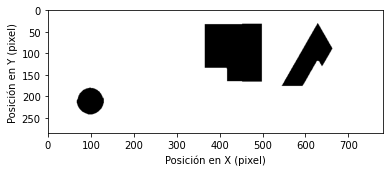

In [ ]:
# Filtro para eliminar puntos indeseados despues de la segmentación y binarizacion por color

#Es similar a un filtro sal pimienta, dado que a la hora de hacer las pruebas de robustez algunas imagenes tienen
#bordes con los colores originales, lo cual entorpecería el sistema, por eso se revisa a los vecinos y se elige el mayor
#se adelgazan las figuras y se desaparecen puntos y bordes indeseados.

filtrada = np.ones((h_img,w_img)) #se genera una imagen en blanco
pas_bin = bin_image  #se pasa la imagen binaria para recorrerla con un for
for i in range(h_img):
    for j in range(w_img):
        if (    pas_bin[i,j] == 0 ):
          if( (  1 < i < (h_img-1)  )  and  ( 1 < j < (w_img-1)) ):
            #si se está dentro del rango, se revisan todos los pixeles
            filtrada[i,j] = max(  pas_bin[i-1,j] ,
                                  pas_bin[i+1,j] ,
                                  pas_bin[i,j-1] ,
                                  pas_bin[i,j+1] ,
                                  
                                  pas_bin[i-1,j-1] ,
                                  pas_bin[i-1,j+1] ,
                                  pas_bin[i+1,j-1] ,
                                  pas_bin[i+1,j+1] )


        else:
            filtrada[i,j] = 1

imgplot_BN=plt.imshow(filtrada, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")


plt.imsave("out_gray_filtrada.png",filtrada, cmap=plt.cm.gray )
plt.show()


13
7
6


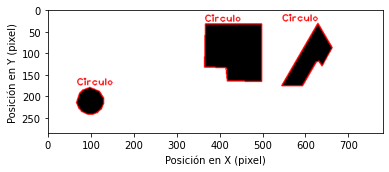

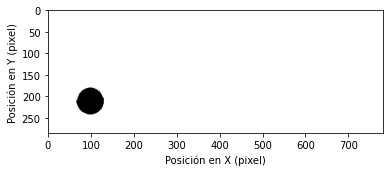

In [ ]:
img_reload = cv2.imread('out.png')  #Se recarga la imagen guardad como salida segmentada por color
img_reload = cv2.imread('out_gray_filtrada.png')  #Se recarga la imagen guardad como salida segmentada por color y filtrada

#Se convierte a RGB
img_reload = cv2.cvtColor(img_reload, cv2.COLOR_BGR2RGB)

#Se convierte a escala de gris
gray = cv2.cvtColor(img_reload, cv2.COLOR_BGR2GRAY)


# Se aplica un filtro de bordes  que incluye un filtro gaussiano con kernel
# y un kernel para detectar gradiente  estableciendo 2 umbrales para determinar cual gradiente es un contorno
# descartando los bordes con pixeles no conectados, e incluyendo unicamente los conectados que se encuentren dentro del umbral
canny = cv2.Canny( gray , 50,150 )


#Se aplican filtros de operadores morfologicos
canny = cv2.dilate(canny, None, iterations=1,)  #dilatacion convoluciona un kernel para obtener el mayor aumentando el tamaño (engorda)
canny = cv2.erode(canny, None, iterations=1)   #dilatacion convoluciona un kernel para obtener el menor aumentando el tamaño (adelgaza)
# Se aplica con una matriz de 3x3 por defecto y con una unica iteracion


#Función para detectar contornos, se le pasa la imagen, se analiza pixel por pixel
#y se determina la conexión entre los valores, se toman unicamente los externos, y con una aproximación de una linea simple 
#de pixeles y no compuesta por varios
cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# OpenCV 4




#**********************************************************************************
#FUNCION PARA DETECCION DE LADOS POR APROXIMACION// CASO NO EXITOSO

#Se recorre cada contorno almacenado
for c in cnts:
  epsilon = 0.01*cv2.arcLength(c,True) #Se calcula la longitud del arco del contorno, con true curva cerrada
  #se multiplica por un valor de sensibilidad para aproximar el poligono 5%
  
  
  #aproximación de una forma de contorno a otra forma que consta de un número menor 
  #de vértices de tal manera que la distancia entre los contornos de las formas es igual a la precisión
  approx = cv2.approxPolyDP(c,epsilon,True) #contorno cerrado
  
  print(len(approx))  # Se imprime cada longitud calculada


  x,y,w,h = cv2.boundingRect(approx) # se retorna la info del recuadrborde rectangular minimo para ubicar el texto en la imagen
#condicionales para establecer el tipo de figura según la aproximación de forma
  if len(approx)==3:
    cv2.putText(img_reload,'Triangulo', (x,y-5),1,1.5,(255,0,0),2)
    cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)
  if len(approx)==4:
    cv2.putText(img_reload,'Cuadrado', (x,y-5),1,1.5,(255,0,0),2)
    cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)
  else:
    cv2.putText(img_reload,'Circulo', (x,y-5),1,1.5,(255,0,0),2)
    cv2.drawContours(img_reload, [approx], 0, (255,0,0),2)

#Se imprime la figura
plt.imshow(img_reload, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")
plt.show()

#*******************************************************************************

# Se introduce el contorno a analizar
cnt_sh = cnts[0]


encontrado = np.ones((h_img,w_img)) # Se generar una nueva imajen en blanco
cv2.fillPoly(encontrado, pts =[cnt_sh], color=(0,0,0)) # se rellena con 0 el espacio interno del contorno seleccionado
#Se imprime la imagen en escala de grises
plt.imshow(encontrado, cmap=plt.cm.gray)
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")
plt.show()

#Condicional que permite unir los pixeles que conforman al cuadro y completarlo.
if (len(cnts) > 3):
  cnt_sh2 = cnts[3]
  encontrado2 = np.ones((h_img,w_img)) # Se generar una nueva imajen en blanco
  cv2.fillPoly(encontrado, pts =[cnt_sh2], color=(0,0,0)) # se rellena con 0 el espacio interno del contorno seleccionado
  #Se imprime la imagen en escala de grises
  plt.imshow(encontrado, cmap=plt.cm.gray)
  plt.xlabel("Posición en X (pixel)")
  plt.ylabel("Posición en Y (pixel)")
  plt.show()


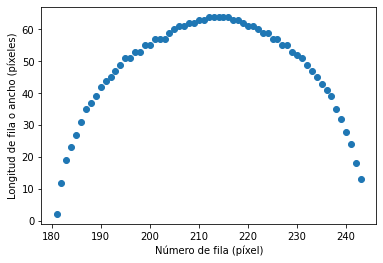

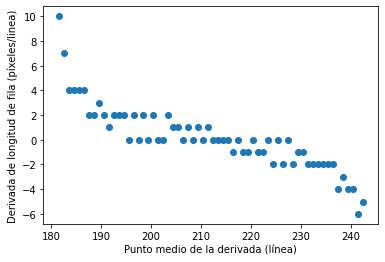

0.1774193548387097
[10.0, 7.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, -2.0, 0.0, -2.0, 0.0, -2.0, -1.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -4.0, -3.0, -4.0, -4.0, -6.0, -5.0]
0


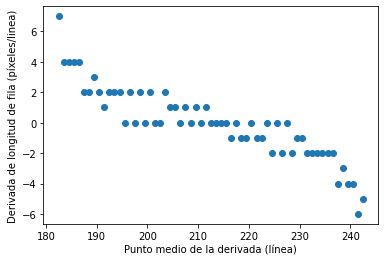

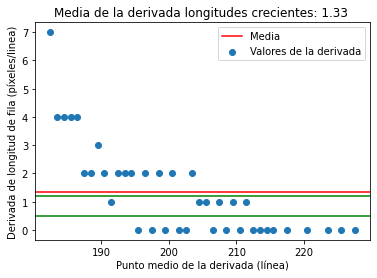


**RESULTADOS** 

1.3333333333333333
Circulo


In [ ]:
from matplotlib.markers import TICKDOWN
#METODO PROPIOPARA DETERMINAR LA FORMA.

#dado se en la imagen las figuras son imcompletas y no hay mas informacion (aparte de la de contexto), entonces se
#decide hacer una inspección de arriba hacia abajo, guardando los valores de longitud de cada linea y cual linea corresponde

#GRADIENTE VERTICAL COMPLETO******************************************
num_fila = []
fila_len = [] #arrays para guardar los datos

#Recorrido de la imagen
for i in range(h_img):
  fila_pri = []
  for j in range(w_img):
    if (    encontrado[i,j] == 0 ):
      fila_pri.append(j)
  if( len(fila_pri) != 0):
    fila_len.append(len(fila_pri))
    num_fila.append(i)


#El resultado se implime como una gráfica que representa el gradiente completo del ancho de la figura
plt.scatter(num_fila , fila_len)
plt.xlabel("Número de fila (píxel)")
plt.ylabel("Longitud de fila o ancho (píxeles)")
plt.show()










#En estos casos, se nota que para un cuadro su gradiente debe ser constante
#un triangulo debe ser creciente lineal y el circulo debe ser cuadratico (al ser completos)
#por lo que se decide calcular la derivada para aproximar un valor constante para comparar


#DERIVADA**************************************************************
deriva_y = []
deriva_x = []

#Se recorren los datos de los gradientes y se calcula la derivada

for i in range(len(fila_len)-1):
  deriva_x.append( num_fila[i]  +  ((num_fila[i+1] - num_fila[i])/2))
  deriva_y.append((fila_len[i+1] - fila_len[i])  /  (num_fila[i+1] - num_fila[i]))

  
#El resultado se implime como una gráfica que representa la derivada del ancho respecto a las filas
plt.scatter(deriva_x , deriva_y)
plt.xlabel("Punto medio de la derivada (línea)")
plt.ylabel("Derivada de longitud de fila (píxeles/linea)")
plt.show()


# Se imprimen valores para analizar el comportamiento del conjunto de la derivada
print(np.mean(deriva_y))
print(deriva_y)
print(round(np.mean(deriva_y)))




#filtrar puntos extraños*************************
deriva_y_f = []
deriva_x_f = []
rango = (max(deriva_y) - min(deriva_y) ) * 0.5  # rango dentro del 50% del rango max desde la media


#se recorren los puntos para eliminar los más extremos mayores al 50% respecto a la media.
for i in range(len(deriva_y)):
  if ( ( np.median(deriva_y) - rango) <= deriva_y[i] <=  ( np.median(deriva_y) + rango ) ):
    deriva_x_f.append(deriva_x[i])
    deriva_y_f.append(deriva_y[i])


# se imprime el resultado
plt.scatter(deriva_x_f , deriva_y_f)
plt.xlabel("Punto medio de la derivada (línea)")
plt.ylabel("Derivada de longitud de fila (píxeles/linea)")
plt.show()








#Ahora bien, considerando una figura completa de arriba hacia abajo el gradiente debe
#ser positivo unicamente, por esto se hace un array para filtrar los puntos negativos
#que corresponden a las secciones completas de la figura


#pendiente positiva*************************************************************

deriva_y_pos = [] #arreglos para guardar los puntos correspondientes a pendiente positiva
deriva_x_pos = []

for i in range(len(deriva_y_f)):
  if ( deriva_y_f[i] >= 0)  :
    deriva_x_pos.append(deriva_x_f[i])
    deriva_y_pos.append(deriva_y_f[i])

  
  #Se imprimen los resultados
plt.scatter(deriva_x_pos , deriva_y_pos, label='Valores de la derivada')
plt.axhline(y=np.mean(deriva_y_pos), color='r', linestyle='-', label='Media')
plt.axhline(y= 1.2, color='g', linestyle='-')
plt.axhline(y = 0.5, color='g', linestyle='-')
plt.title(f"Media de la derivada longitudes crecientes: {round(np.mean(deriva_y_pos), 2)} " )
plt.xlabel("Punto medio de la derivada (línea)")
plt.ylabel("Derivada de longitud de fila (píxeles/linea)")
plt.legend()
plt.show()




# Se imprimen los resultados, junto con la media con la que se determina el umbral para clasificar la figura
print("\n**RESULTADOS** \n")
print(np.mean(deriva_y_pos))

#Se emplea la media para que losvalores mayores en el circulo afecten bastante


# Se determinan los umbrales para la derivada asumiendo que para una recta la mayoría
# son cero (cuadro), para el caso de la pendiente de estos triengulos tiende a 1
# y para la derivada de la curvacuadrática, se tendrán valores mucho mayores.


#Se prueba la sintonización para la imagen y se guardan los string de forma
string_form = ""

# Se determinan los umbrales para la derivada asumiendo que para una recta la mayoría
# son cero (cuadro), para el caso de la pendiente de estos triengulos tiende a 1
# y para la derivada de la curvacuadrática, se tendrán valores mucho mayores.

if ( 0 <= (np.mean(deriva_y_pos)) < 0.5 ):
  print("Cuadro")
  string_form = "Cuadro"
if ( 0.5 <= (np.mean(deriva_y_pos))<= 1.2):
  print("Triangulo")
  string_form = "Triangulo"
if ( 1.2 < (np.mean(deriva_y_pos))):
  print("Circulo")
  string_form = "Circulo"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


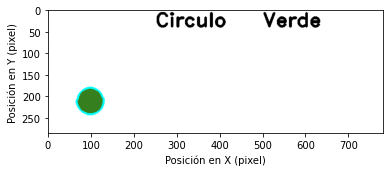

In [ ]:
#RESULTADO FINAL***************************************************************

r_final = np.ones((h_img,w_img, 3))   #imagen nueva con tres canales y pixeles en blanco
#se recorre el tamaño de imagen y se asigna el color original para los pixeles en la mascara, para el resto un 1
for i in range(h_img):
    for j in range(w_img):
        if (    encontrado[i,j] == 0 ):
          r_final[i,j] = new_color[i,j]

        else:
            r_final[i,j] = new_color[i,j] = 1



r_final_sh = cv2.cvtColor(np.float32(r_final), cv2.COLOR_BGR2RGB)   #  Se converte a RGB

cv2.drawContours(r_final_sh, [cnt_sh], 0, (0,150,150), 3)  # Se dibuja el contorno por encima escogiendo color, tamaño y grosor


#Condicional para cuadro completo
if (len(cnts) > 3):
  cv2.drawContours(r_final_sh, [cnt_sh2], 0, (0,150,150), 3)  # Se dibuja el contorno por encima escogiendo color, tamaño y grosor

cv2.putText(r_final_sh,string_form, (250,40),2,1.5,(0,0,0),3)  # Se dibuja el string por encima indicando la forma,con color, tamaño y grosor
cv2.putText(r_final_sh,string_color, (500,40),2,1.5,(0,0,0),3)  # Se dibuja el string por encima indicando la forma,con color, tamaño y grosor


#Se imprime la figura con las etiquetas de ejes
plt.xlabel("Posición en X (pixel)")
plt.ylabel("Posición en Y (pixel)")

plt.imshow(r_final_sh)

plt.show()